In [1]:
import torch
import torch.optim as optim
from torchsummary import summary

from utils import get_device, train, test, show_losses, show_images, display_incorrect_images
from model import Model_S8
from dataset import get_train_test_loaders

In [2]:
device = get_device()
print(f'Device : {device}')

Device : cuda


In [3]:
train_loader, test_loader = get_train_test_loaders()

100%|██████████| 170498071/170498071 [00:13<00:00, 13076679.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


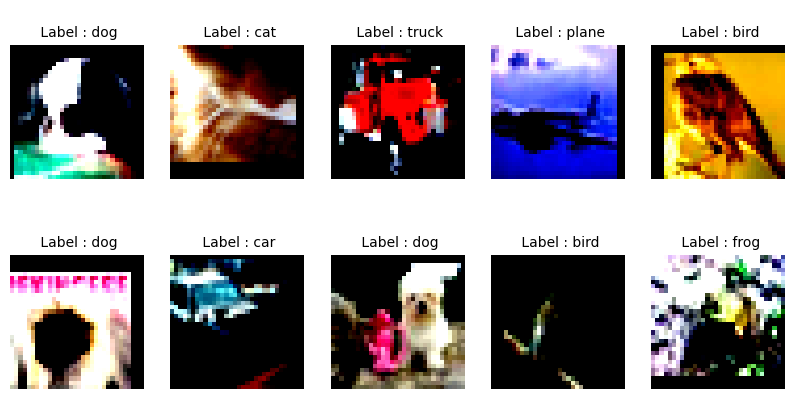

In [4]:
show_images(train_loader)

In [6]:
model = Model_S8('batch').to(device)
summary(model, input_size=(3,32,32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
    

In [7]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 20
for epoch in range(1, EPOCHS+1):
  print(f'Epoch : {epoch}')
  train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
  test(model, device, test_loader, test_losses, test_acc)

Epoch : 1


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=1.5323787927627563 Batch_id=390 Accuracy=37.41: 100%|██████████| 391/391 [00:37<00:00, 10.52it/s]



Test set: Average loss: 1.4549, Accuracy: 4590/10000 (45.90%)

Epoch : 2


Loss=1.3778282403945923 Batch_id=390 Accuracy=52.78: 100%|██████████| 391/391 [00:37<00:00, 10.56it/s]



Test set: Average loss: 1.1847, Accuracy: 5732/10000 (57.32%)

Epoch : 3


Loss=1.300837755203247 Batch_id=390 Accuracy=58.19: 100%|██████████| 391/391 [00:37<00:00, 10.55it/s]



Test set: Average loss: 1.0829, Accuracy: 6017/10000 (60.17%)

Epoch : 4


Loss=0.9791038632392883 Batch_id=390 Accuracy=61.14: 100%|██████████| 391/391 [00:38<00:00, 10.27it/s]



Test set: Average loss: 1.0938, Accuracy: 6135/10000 (61.35%)

Epoch : 5


Loss=1.0984041690826416 Batch_id=390 Accuracy=63.18: 100%|██████████| 391/391 [00:36<00:00, 10.64it/s]



Test set: Average loss: 0.9843, Accuracy: 6524/10000 (65.24%)

Epoch : 6


Loss=0.9602201581001282 Batch_id=390 Accuracy=65.21: 100%|██████████| 391/391 [00:36<00:00, 10.71it/s]



Test set: Average loss: 0.9496, Accuracy: 6646/10000 (66.46%)

Epoch : 7


Loss=0.9801739454269409 Batch_id=390 Accuracy=66.51: 100%|██████████| 391/391 [00:36<00:00, 10.79it/s]



Test set: Average loss: 0.9061, Accuracy: 6843/10000 (68.43%)

Epoch : 8


Loss=0.9664618372917175 Batch_id=390 Accuracy=67.53: 100%|██████████| 391/391 [00:35<00:00, 10.95it/s]



Test set: Average loss: 0.9775, Accuracy: 6607/10000 (66.07%)

Epoch : 9


Loss=0.9247695207595825 Batch_id=390 Accuracy=68.56: 100%|██████████| 391/391 [00:37<00:00, 10.51it/s]



Test set: Average loss: 0.8317, Accuracy: 7026/10000 (70.26%)

Epoch : 10


Loss=1.0020778179168701 Batch_id=390 Accuracy=69.53: 100%|██████████| 391/391 [00:35<00:00, 11.03it/s]



Test set: Average loss: 0.8438, Accuracy: 7076/10000 (70.76%)

Epoch : 11


Loss=0.7928248643875122 Batch_id=390 Accuracy=70.88: 100%|██████████| 391/391 [00:35<00:00, 10.98it/s]



Test set: Average loss: 0.8028, Accuracy: 7168/10000 (71.68%)

Epoch : 12


Loss=0.8378938436508179 Batch_id=390 Accuracy=71.42: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]



Test set: Average loss: 0.7766, Accuracy: 7260/10000 (72.60%)

Epoch : 13


Loss=0.9168572425842285 Batch_id=390 Accuracy=72.33: 100%|██████████| 391/391 [00:35<00:00, 11.02it/s]



Test set: Average loss: 0.7559, Accuracy: 7395/10000 (73.95%)

Epoch : 14


Loss=0.9124016761779785 Batch_id=390 Accuracy=72.57: 100%|██████████| 391/391 [00:35<00:00, 10.95it/s]



Test set: Average loss: 0.7504, Accuracy: 7382/10000 (73.82%)

Epoch : 15


Loss=0.8256464004516602 Batch_id=390 Accuracy=73.27: 100%|██████████| 391/391 [00:36<00:00, 10.77it/s]



Test set: Average loss: 0.7179, Accuracy: 7506/10000 (75.06%)

Epoch : 16


Loss=0.6862338781356812 Batch_id=390 Accuracy=73.65: 100%|██████████| 391/391 [00:36<00:00, 10.79it/s]



Test set: Average loss: 0.7391, Accuracy: 7413/10000 (74.13%)

Epoch : 17


Loss=0.7630938291549683 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:36<00:00, 10.64it/s]



Test set: Average loss: 0.7311, Accuracy: 7451/10000 (74.51%)

Epoch : 18


Loss=0.650753378868103 Batch_id=390 Accuracy=74.54: 100%|██████████| 391/391 [00:37<00:00, 10.48it/s]



Test set: Average loss: 0.6746, Accuracy: 7675/10000 (76.75%)

Epoch : 19


Loss=0.7830158472061157 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:37<00:00, 10.41it/s]



Test set: Average loss: 0.6748, Accuracy: 7698/10000 (76.98%)

Epoch : 20


Loss=0.7991368770599365 Batch_id=390 Accuracy=75.46: 100%|██████████| 391/391 [00:37<00:00, 10.51it/s]



Test set: Average loss: 0.6651, Accuracy: 7738/10000 (77.38%)



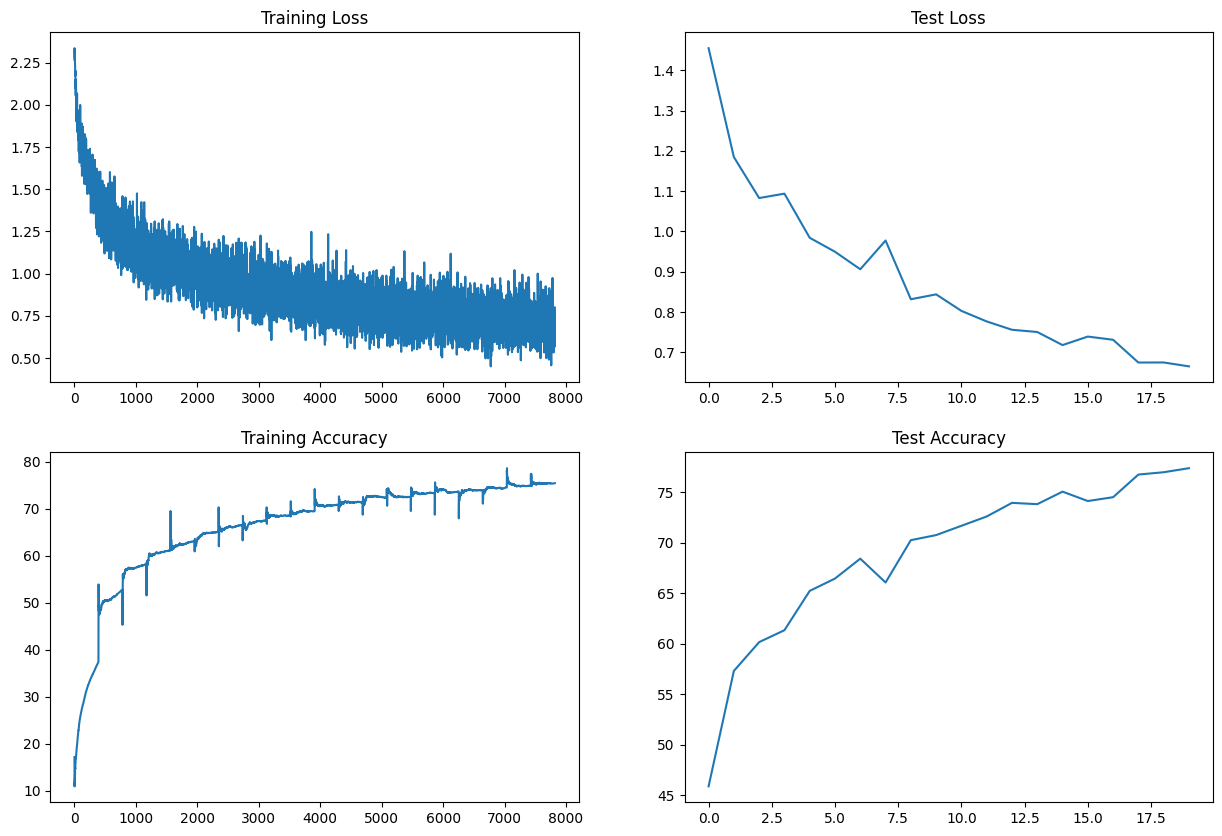

In [10]:
cpu_train_losses = [loss.cpu().item() for loss in train_losses]
show_losses(cpu_train_losses,train_acc, test_losses,test_acc)

In [11]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


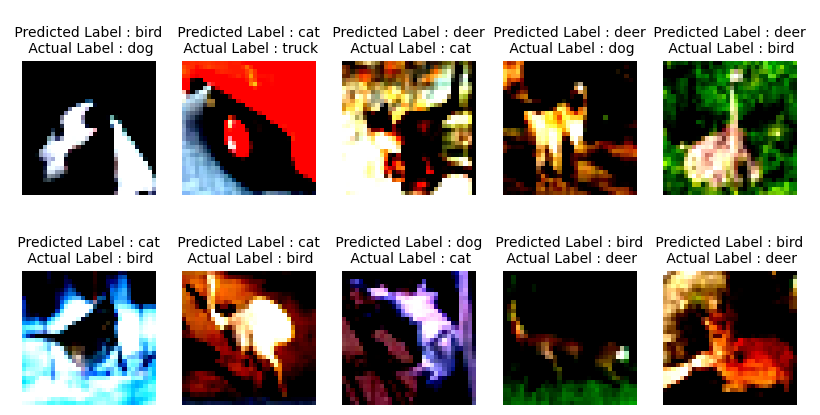

In [12]:
display_incorrect_images(wrong_prediction_list, 10)